# Common Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_dataaset(path, anomaly_points, time_col='timestamp', anomaly_col='anomaly'):
    # Read dataset
    df = pd.read_csv(path,low_memory=False)
    df[time_col] = pd.to_datetime(df[time_col])

    # Labeling: if anomaly then 1 else 0
    df[anomaly_col] = 0  # Set default values
    for start, end in anomaly_points:
        df.loc[((df[time_col] >= start) & (df[time_col] <= end)), anomaly_col] = 1

    return df


def plot_anomaly(df, label='anomaly', plot_item='value', time_col='timestamp'):
    sections = list()
    state = df.iloc[0][label]
    start = 0
    for i in df.index:
        if df.loc[i][label] != state:
            state = df.loc[i][label]
            sections.append(df.loc[start:i].copy(deep=True))
            start = i

    plt.clf()
    plt.figure().set_figwidth(20)
    for s in sections:
        # Change index
        s.index = s[time_col]

        color = 'blue' if s.iloc[0][label] == 0 else 'red'
        # plt.plot(s.index, s[plot_item], color=color)
        plt.scatter(s.index, s[plot_item], color=color)
    plt.show()


def read_plot(files, anomaly_points, i):
    raw = read_dataaset('data/'+files[i], anomaly_points[files[i]])
    print(files[i])
    plot_anomaly(raw)

# Anomaly Points

In [2]:
anomaly_points = {
    "ambient_temperature_system_failure.csv": [
        [
            "2013-12-15 07:00:00.000000",
            "2013-12-30 09:00:00.000000"
        ],
        [
            "2014-03-29 15:00:00.000000",
            "2014-04-20 22:00:00.000000"
        ]
    ],
    "cpu_utilization_asg_misconfiguration.csv": [
        [
            "2014-07-10 12:29:00.000000",
            "2014-07-15 17:19:00.000000"
        ]
    ],
    "ec2_request_latency_system_failure.csv": [
        [
            "2014-03-14 03:31:00.000000",
            "2014-03-14 14:41:00.000000"
        ],
        [
            "2014-03-18 17:06:00.000000",
            "2014-03-19 04:16:00.000000"
        ],
        [
            "2014-03-20 21:26:00.000000",
            "2014-03-21 03:41:00.000000"
        ]
    ],
    "machine_temperature_system_failure.csv": [
        [
            "2013-12-10 06:25:00.000000",
            "2013-12-12 05:35:00.000000"
        ],
        [
            "2013-12-15 17:50:00.000000",
            "2013-12-17 17:00:00.000000"
        ],
        [
            "2014-01-27 14:20:00.000000",
            "2014-01-29 13:30:00.000000"
        ],
        [
            "2014-02-07 14:55:00.000000",
            "2014-02-09 14:05:00.000000"
        ]
    ],
    "nyc_taxi.csv": [
        [
            "2014-10-30 15:30:00.000000",
            "2014-11-03 22:30:00.000000"
        ],
        [
            "2014-11-25 12:00:00.000000",
            "2014-11-29 19:00:00.000000"
        ],
        [
            "2014-12-23 11:30:00.000000",
            "2014-12-27 18:30:00.000000"
        ],
        [
            "2014-12-29 21:30:00.000000",
            "2015-01-03 04:30:00.000000"
        ],
        [
            "2015-01-24 20:30:00.000000",
            "2015-01-29 03:30:00.000000"
        ]
    ],
    "rogue_agent_key_hold.csv": [
        [
            "2014-07-15 04:35:00.000000",
            "2014-07-15 13:25:00.000000"
        ],
        [
            "2014-07-17 05:50:00.000000",
            "2014-07-18 06:45:00.000000"
        ]
    ],
    "rogue_agent_key_updown.csv": [
        [
            "2014-07-14 17:00:00.000000",
            "2014-07-15 15:00:00.000000"
        ],
        [
            "2014-07-16 21:50:00.000000",
            "2014-07-17 19:50:00.000000"
        ]
    ]
}

files = list(anomaly_points.keys())

ambient_temperature_system_failure.csv


<Figure size 640x480 with 0 Axes>

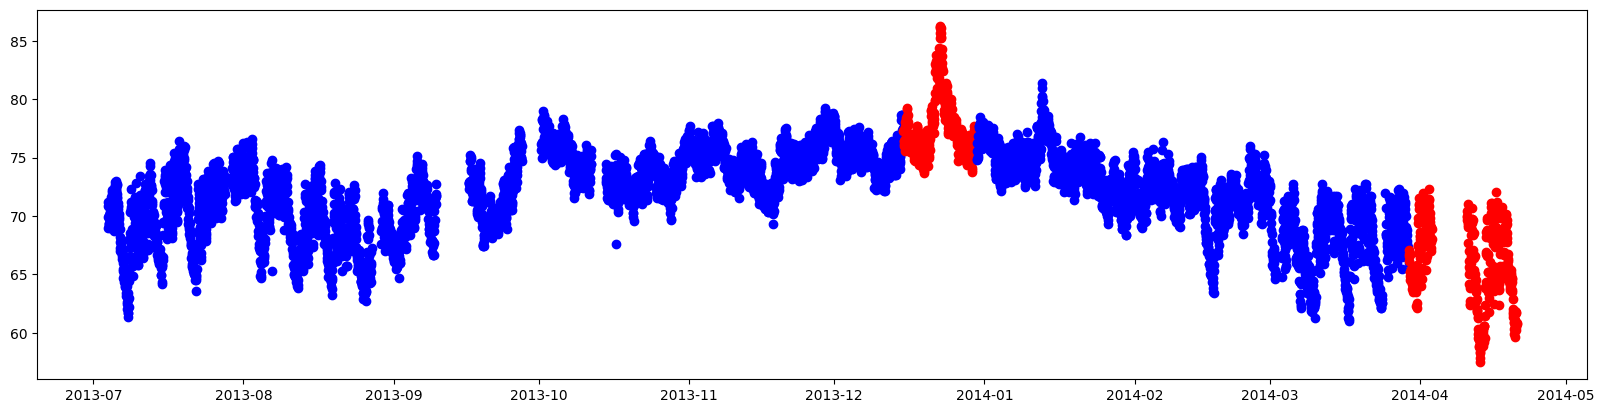

In [3]:
read_plot(files, anomaly_points, 0)

cpu_utilization_asg_misconfiguration.csv


<Figure size 640x480 with 0 Axes>

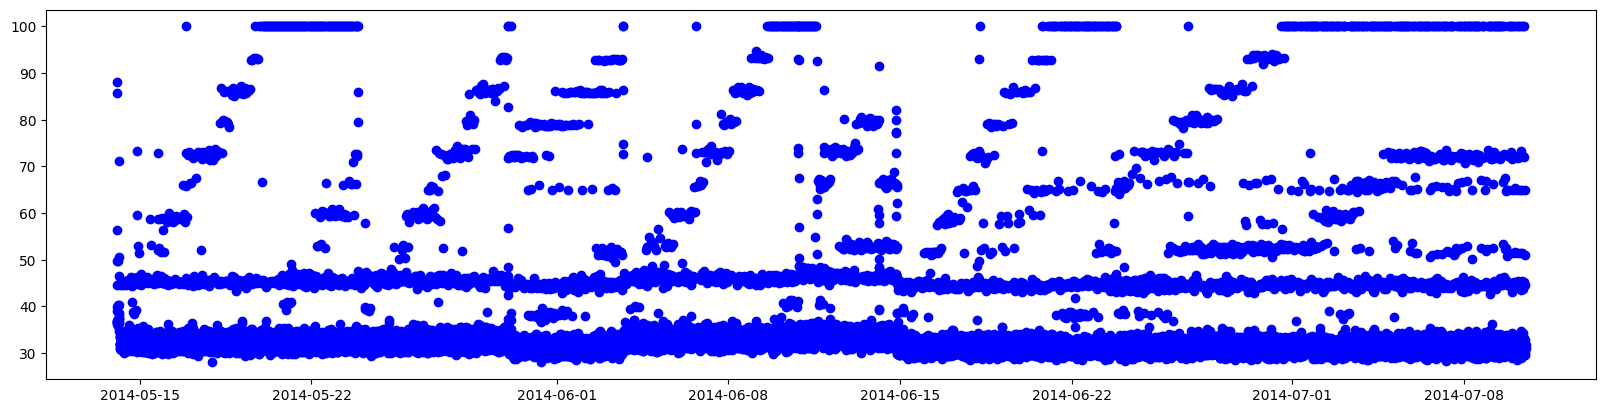

In [4]:
read_plot(files, anomaly_points, 1)

ec2_request_latency_system_failure.csv


<Figure size 640x480 with 0 Axes>

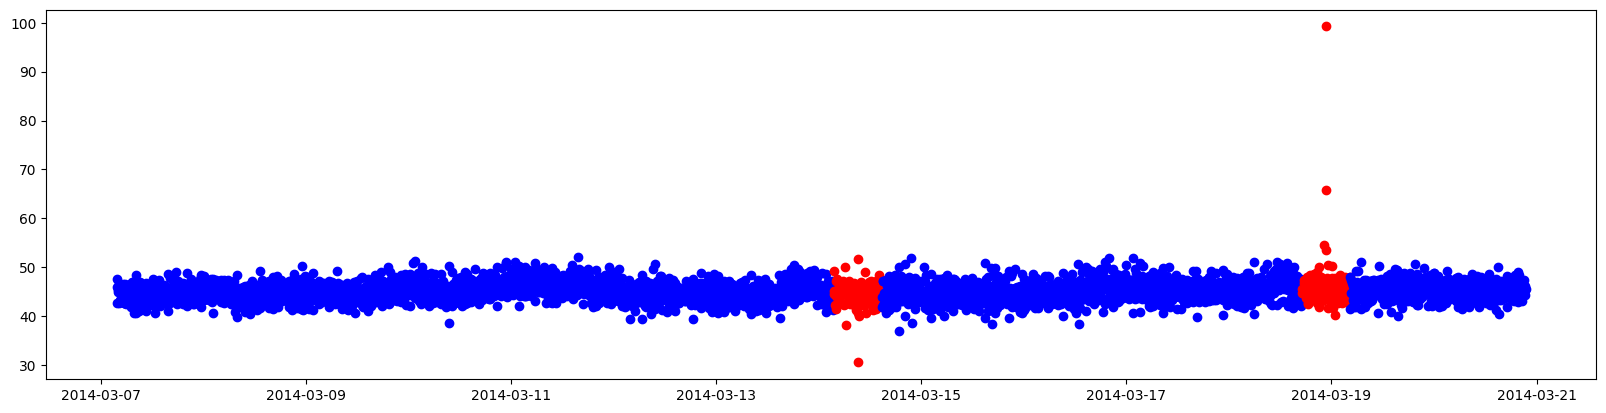

In [5]:
read_plot(files, anomaly_points, 2)

machine_temperature_system_failure.csv


<Figure size 640x480 with 0 Axes>

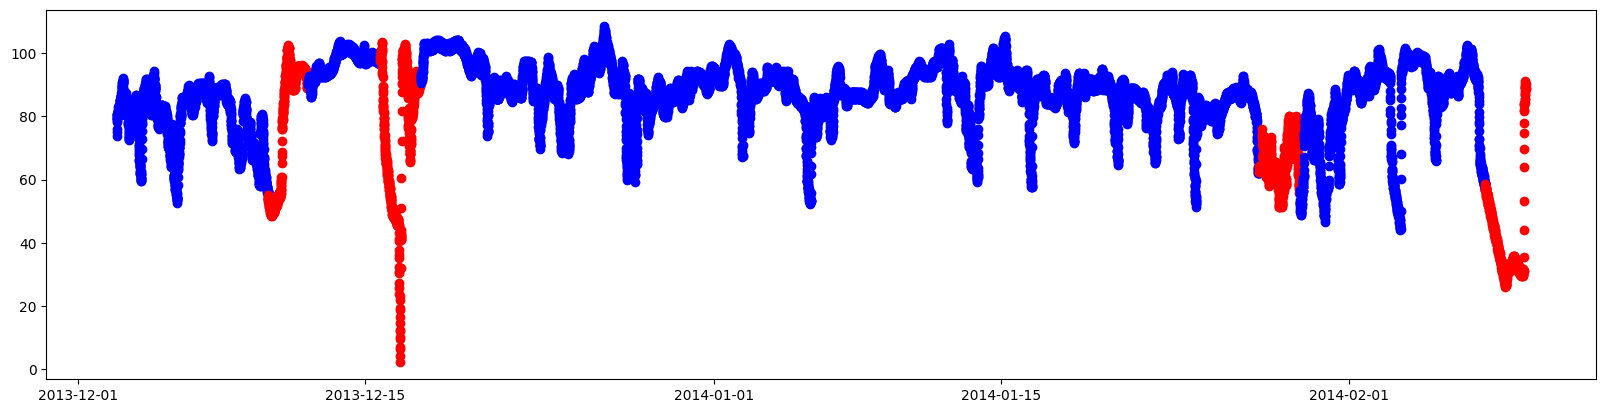

In [6]:
read_plot(files, anomaly_points, 3)

nyc_taxi.csv


<Figure size 640x480 with 0 Axes>

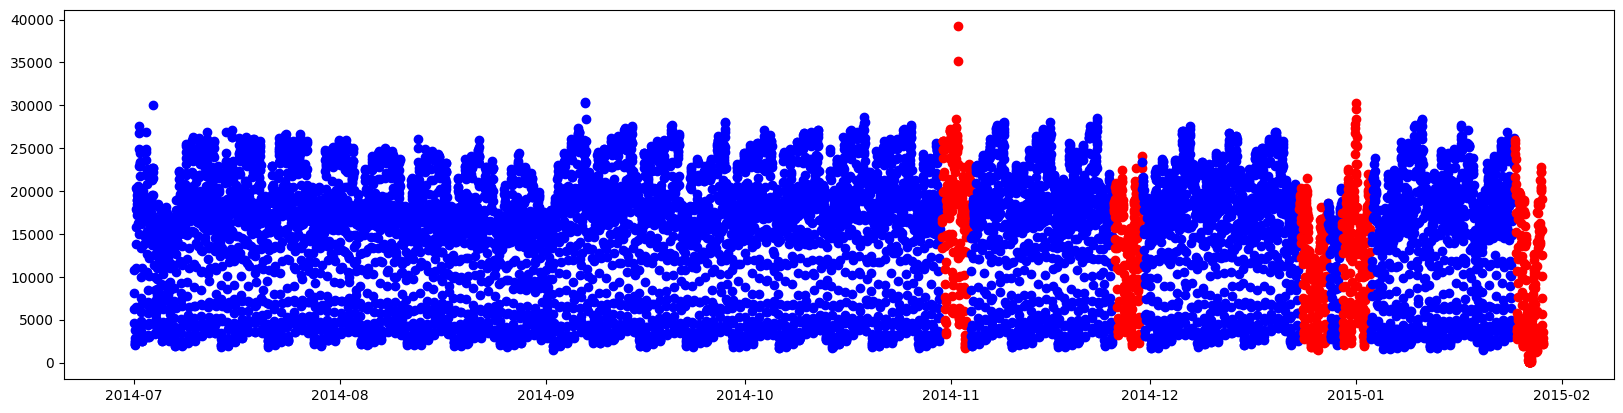

In [7]:
read_plot(files, anomaly_points, 4)

rogue_agent_key_hold.csv


<Figure size 640x480 with 0 Axes>

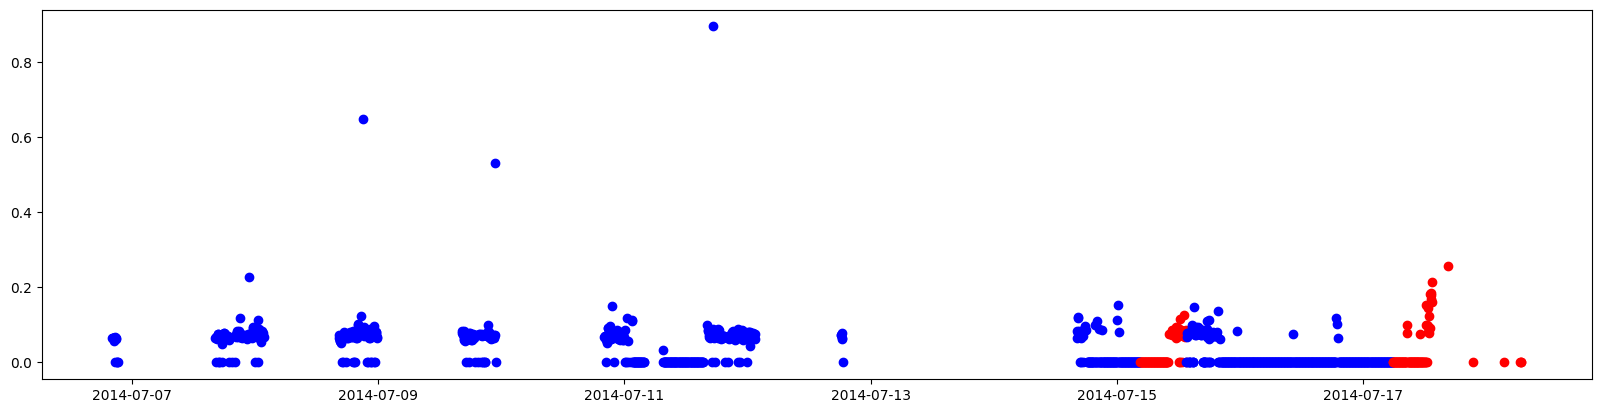

In [8]:
read_plot(files, anomaly_points, 5)

rogue_agent_key_updown.csv


<Figure size 640x480 with 0 Axes>

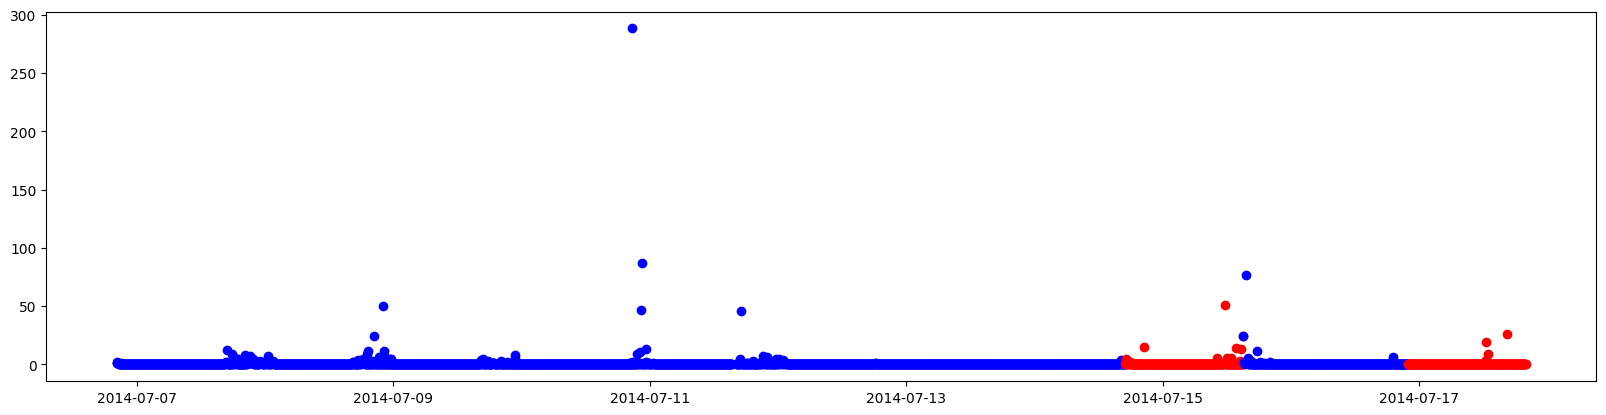

In [9]:
read_plot(files, anomaly_points, 6)